# Background extraction: Separating common image parts by average pixel intensities

> **Dataset [443]**
 
521 day and night images of <b>1640 x 1232 pixels</b>.

In [2]:
import os
import numpy as np
from PIL import Image
from IPython.display import display

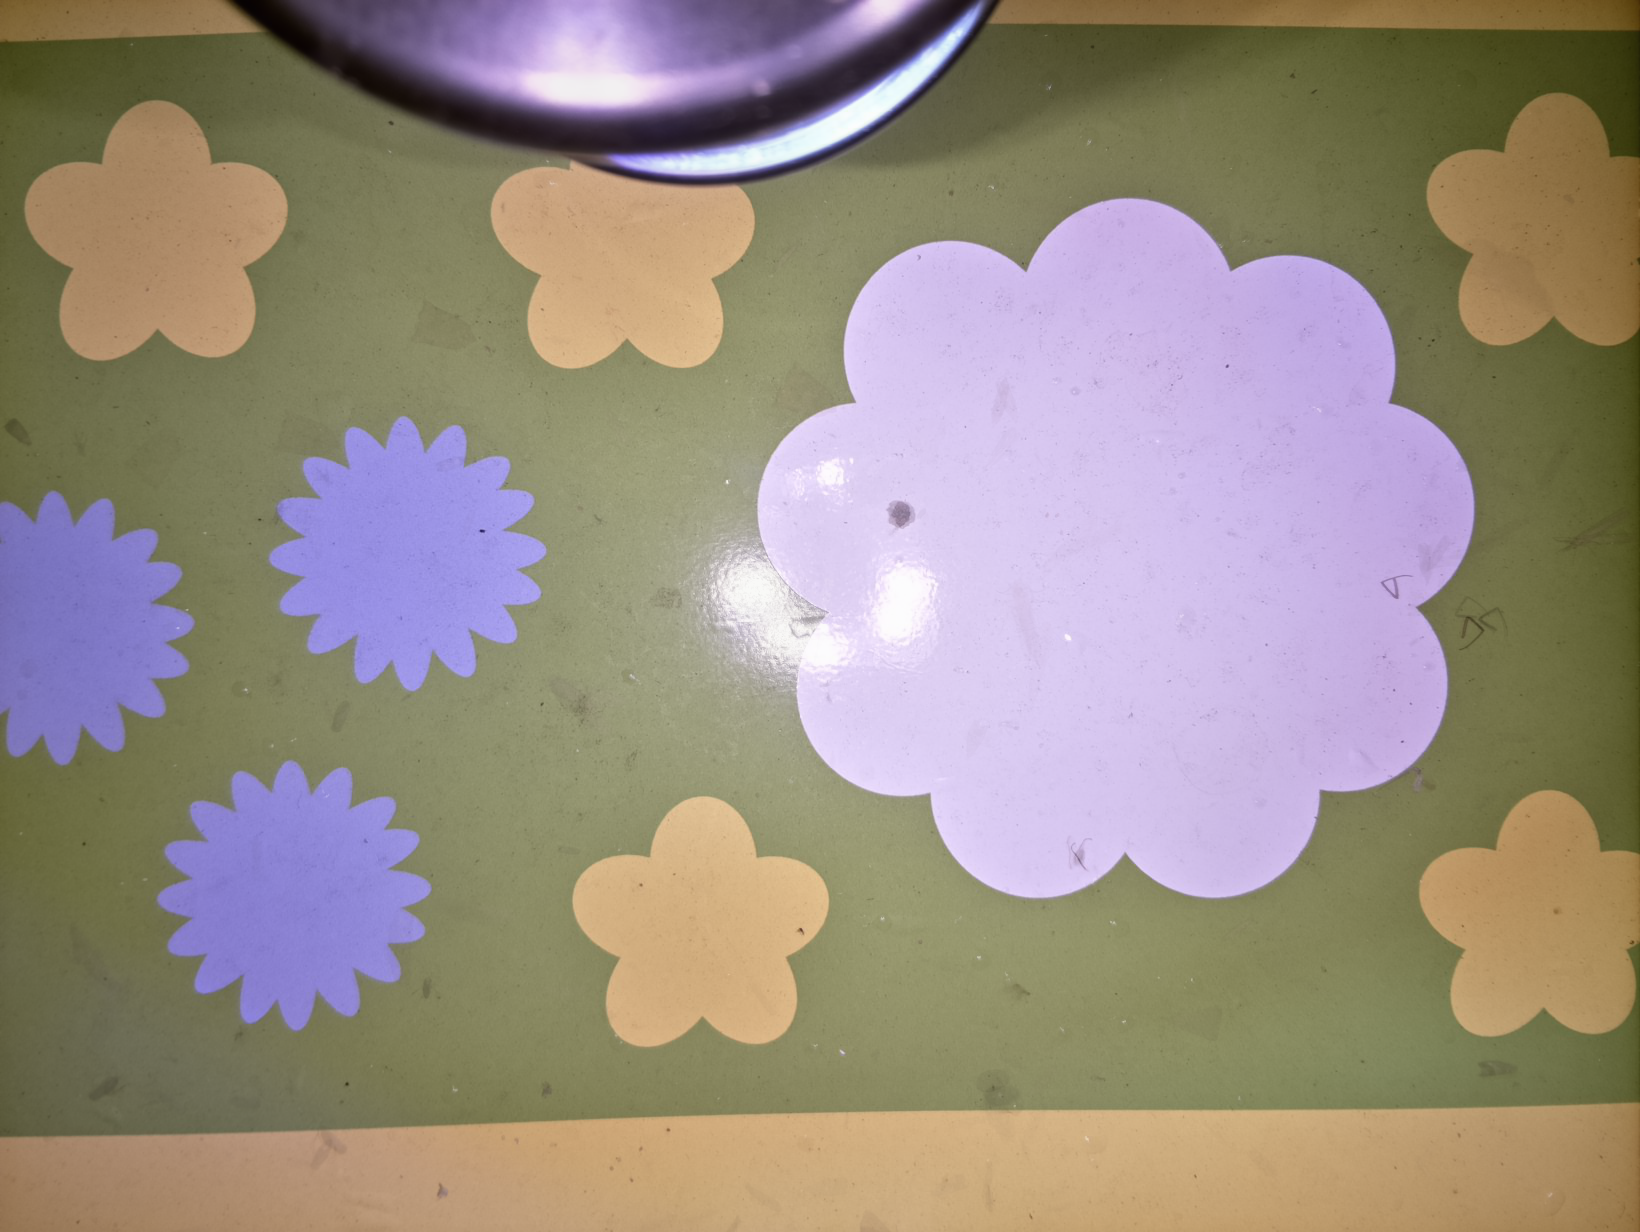

In [3]:
# Access all files in directory
allfiles = os.listdir(os.getcwd())
imlist = [filename for filename in allfiles if filename[-4:].lower() in [".jpg", ".jpeg"]]

# Ensure there are images to process
if not imlist:
    raise ValueError("No JPG images found in the current directory.")

# All images are the same size, get dimensions of first image
w, h = Image.open(imlist[0]).size

# Numpy array of floats to store the average (assume RGB images)
arr = np.zeros((h, w, 3), float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr = np.array(Image.open(im), dtype=float)
    if imarr.shape != (h, w, 3):
        raise ValueError("All images must have the same dimensions")
    arr += imarr / len(imlist)

# Round values in array and cast as 8-bit integer
arr = np.array(np.round(arr), dtype=np.uint8)

# Generate, save, and display final image
out = Image.fromarray(arr, mode="RGB")
out.save("Average.png")
display(out)
